In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("House Price India.csv")

In [4]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [15]:
# round(data["Price"].describe().reset_index()["Price"],2)
stats = data["Price"].describe().reset_index()
stats["Price"] = round(stats["Price"],2)

In [16]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [17]:
# check for n/a values 
data.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [19]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [22]:
# for na values
data.dropna(inplace = True)
# for dulicated 
data.drop_duplicates(inplace = True)

In [23]:
# group by condition of the house
data.groupby("condition of the house")["Price"].mean()

condition of the house
1    285497.222222
2    312891.400000
3    539336.477968
4    521082.494579
5    609954.024276
Name: Price, dtype: float64

In [28]:
import matplotlib.pyplot as plt

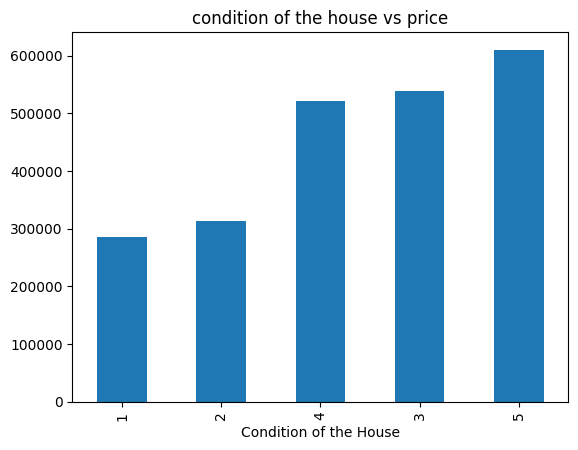

In [30]:
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=True).plot(kind= "bar")
plt.title("condition of the house vs price")
plt.xlabel("Condition of the House")
plt.show()


In [11]:
x = data[['number of bedrooms', 'number of bathrooms', 'living area','condition of the house','Number of schools nearby']]
y = data[["Price"]]

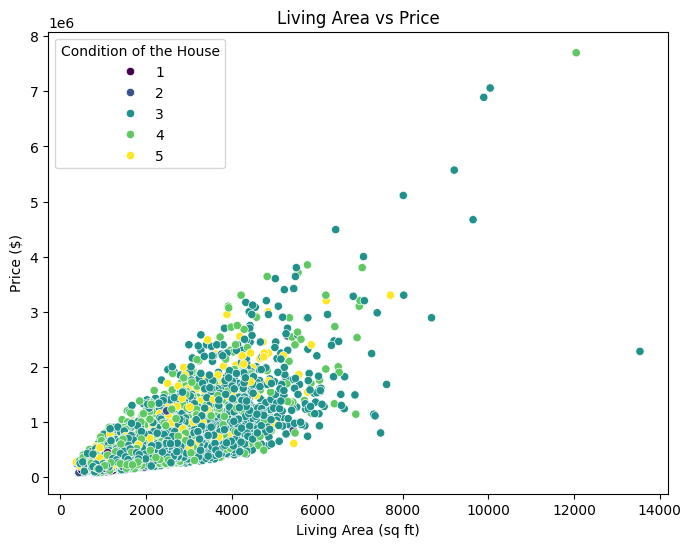

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter Plot: Living Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_data["living area"], y=combined_data["Price"], hue=combined_data["condition of the house"], palette="viridis")
plt.title("Living Area vs Price")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Price ($)")
plt.legend(title="Condition of the House")
plt.show()


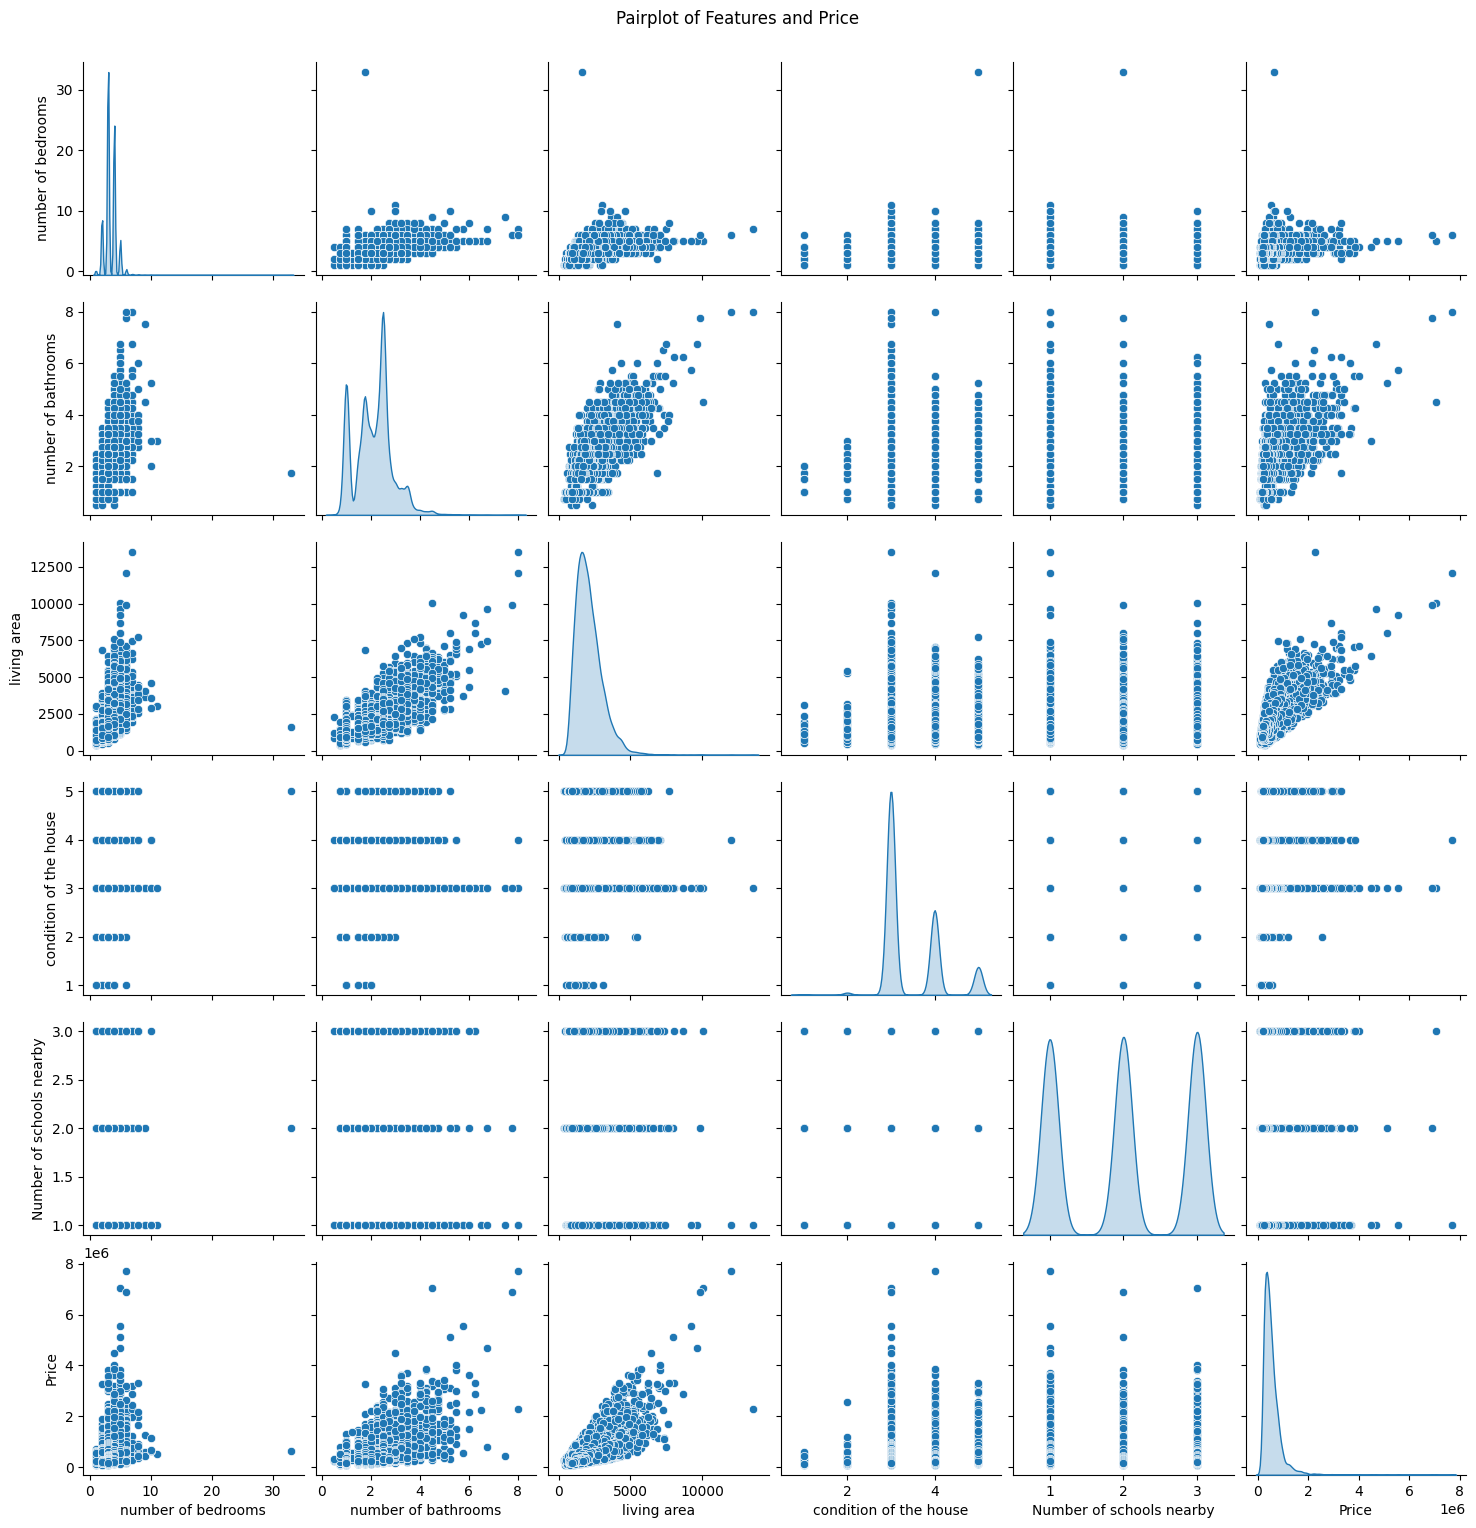

In [19]:


#  Pairplot for Input Features and Price
combined_data = x.copy()
combined_data["Price"] = y
sns.pairplot(combined_data, diag_kind="kde", height=2.5)
plt.suptitle("Pairplot of Features and Price", y=1.02)
plt.show()



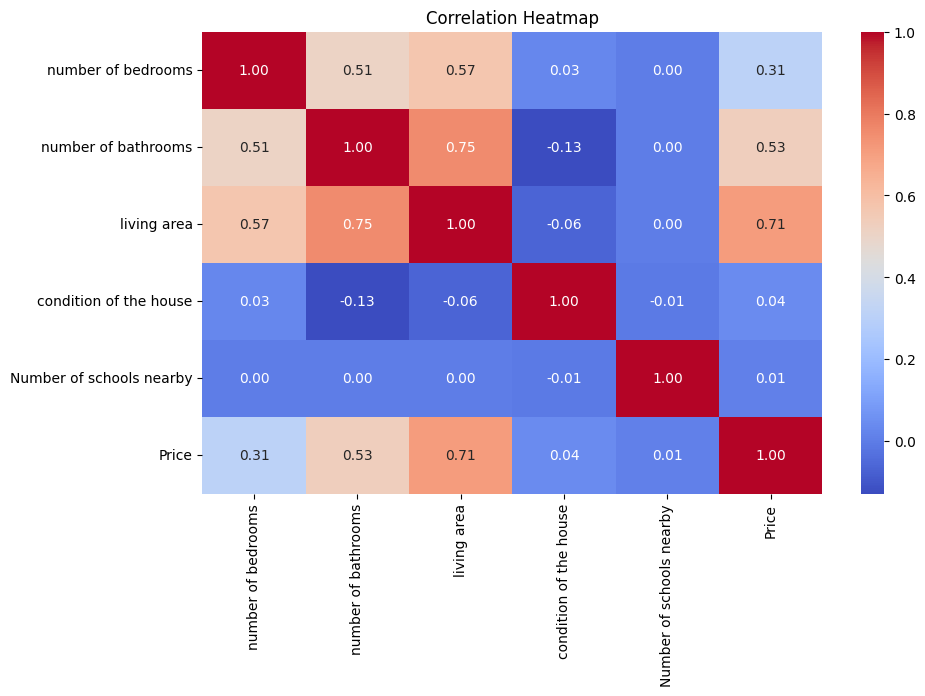

In [20]:
#  Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/var/folders/4y/tmd5zm2923x6twrx9lspf1bc0000gn/T/ipykernel_38492/69359084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_data["number of bedrooms"], y=combined_data["Price"], palette="Set2")


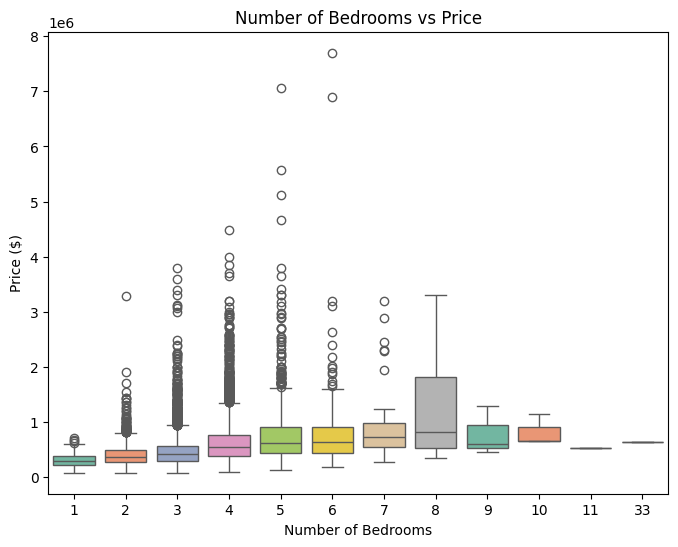

In [21]:
#  Box Plot: Number of Bedrooms vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_data["number of bedrooms"], y=combined_data["Price"], palette="Set2")
plt.title("Number of Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")
plt.show()

In [22]:
x

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [23]:
y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


In [24]:
data.shape[0] * 0.8

11695.2

In [25]:
# split the data into training and testing sets with scikitlearn
# 80% train and 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


In [26]:
x_train.shape

(11695, 5)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    "criterion" : ["mse", "friedman_mse", "mae"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30, 40, 50],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" :  [1,2,4]
}

In [55]:
tree_model = DecisionTreeRegressor()
grid_tree = GridSearchCV(estimator = tree_model, param_grid = param_grid)

In [56]:
grid_tree.fit(x_train, y_train)

/Users/andrewstephens/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/andrewstephens/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andrewstephens/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/andrewstephens/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklear

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [66]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [67]:
tree_preds = grid_tree.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, tree_preds)

np.float64(81294947864.86316)

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
predslr = lr.predict(x_test)

In [75]:
mse = mean_squared_error
mean_squared_error(y_test, predslr)

np.float64(65251688436.20494)

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tree_preds)

np.float64(170400.93227967064)

In [77]:
mean_absolute_error(y_test, predslr)

np.float64(169465.3968621002)

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [92]:
param_gridrfr = {
    "max_depth" : [5,10,15],
    "n_estimators" : [2,3,4,5,6,7,8,9,10]
}

In [93]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)
gridrfr.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [94]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 8}

In [95]:
rfrpredictions = gridrfr.predict(x_test)

In [96]:
mean_absolute_error(y_test, rfrpredictions)

np.float64(163902.5710369743)

In [97]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [98]:
import joblib
joblib.dump(gridrfr, "model.pkl")

['model.pkl']